# Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 1.0 MB/s eta 0:02:02
   ---------------------------------------- 0.3/124.9 MB 1.8 MB/s eta 0:01:11
   ---------------------------------------- 0.5/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 0.8/124.9 MB 2.8 MB/s eta 0:00:44
   ---------------------------------------- 1.0/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.3/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.5/124.9 MB 3.6 MB/s eta 0:00:34
    -----------------------

In [6]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Model Building

### Train Logistic Regression model for sentiment classification Trained Logistic Regression model for initial sentiment classification. 

### A Logistic Regression model was trained to perform initial sentiment classification by analyzing text data and predicting whether the sentiment is positive, negative, or neutral. This simple yet effective approach leverages the relationship between input features and sentiment labels using a probabilistic framework.

In [8]:
# Data split
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define classifiers with pipelines
classifiers = {
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "Multinomial Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ]),
    "Linear SVC": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LinearSVC())
    ]),
    "Random Forest": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', RandomForestClassifier())
    ]),
    "Gradient Boosting": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', GradientBoostingClassifier())
    ]),
    "XGBoost": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

In [10]:
# Train and evaluate each classifier
results = []
confusion_matrices = {}

for name, pipeline in classifiers.items():
    print(f"Training and evaluating: {name}")
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['clf'], "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    results.append((name, acc))

Training and evaluating: Logistic Regression
Training and evaluating: Multinomial Naive Bayes
Training and evaluating: Linear SVC


C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training and evaluating: Random Forest
Training and evaluating: Gradient Boosting
Training and evaluating: XGBoost


C:\Users\sidba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
print(f"Accuracy for {name}: {acc:.2f}")

Accuracy for XGBoost: 0.86


In [13]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [14]:
if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC Score for {name}: {auc:.2f}")

AUC Score for XGBoost: 0.93


In [15]:
# Compare Results
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy"])
print("\nComparison of Classifier Performance:")
print(results_df)


Comparison of Classifier Performance:
                Classifier  Accuracy
0      Logistic Regression    0.8833
1  Multinomial Naive Bayes    0.8525
2               Linear SVC    0.8801
3            Random Forest    0.8487
4        Gradient Boosting    0.8088
5                  XGBoost    0.8575


Confusion Matrix for Logistic Regression: 
[[4308  653]
 [ 514 4525]]
Confusion Matrix for Multinomial Naive Bayes: 
[[4132  829]
 [ 646 4393]]
Confusion Matrix for Linear SVC: 
[[4322  639]
 [ 560 4479]]
Confusion Matrix for Random Forest: 
[[4243  718]
 [ 795 4244]]
Confusion Matrix for Gradient Boosting: 
[[3734 1227]
 [ 685 4354]]
Confusion Matrix for XGBoost: 
[[4158  803]
 [ 622 4417]]


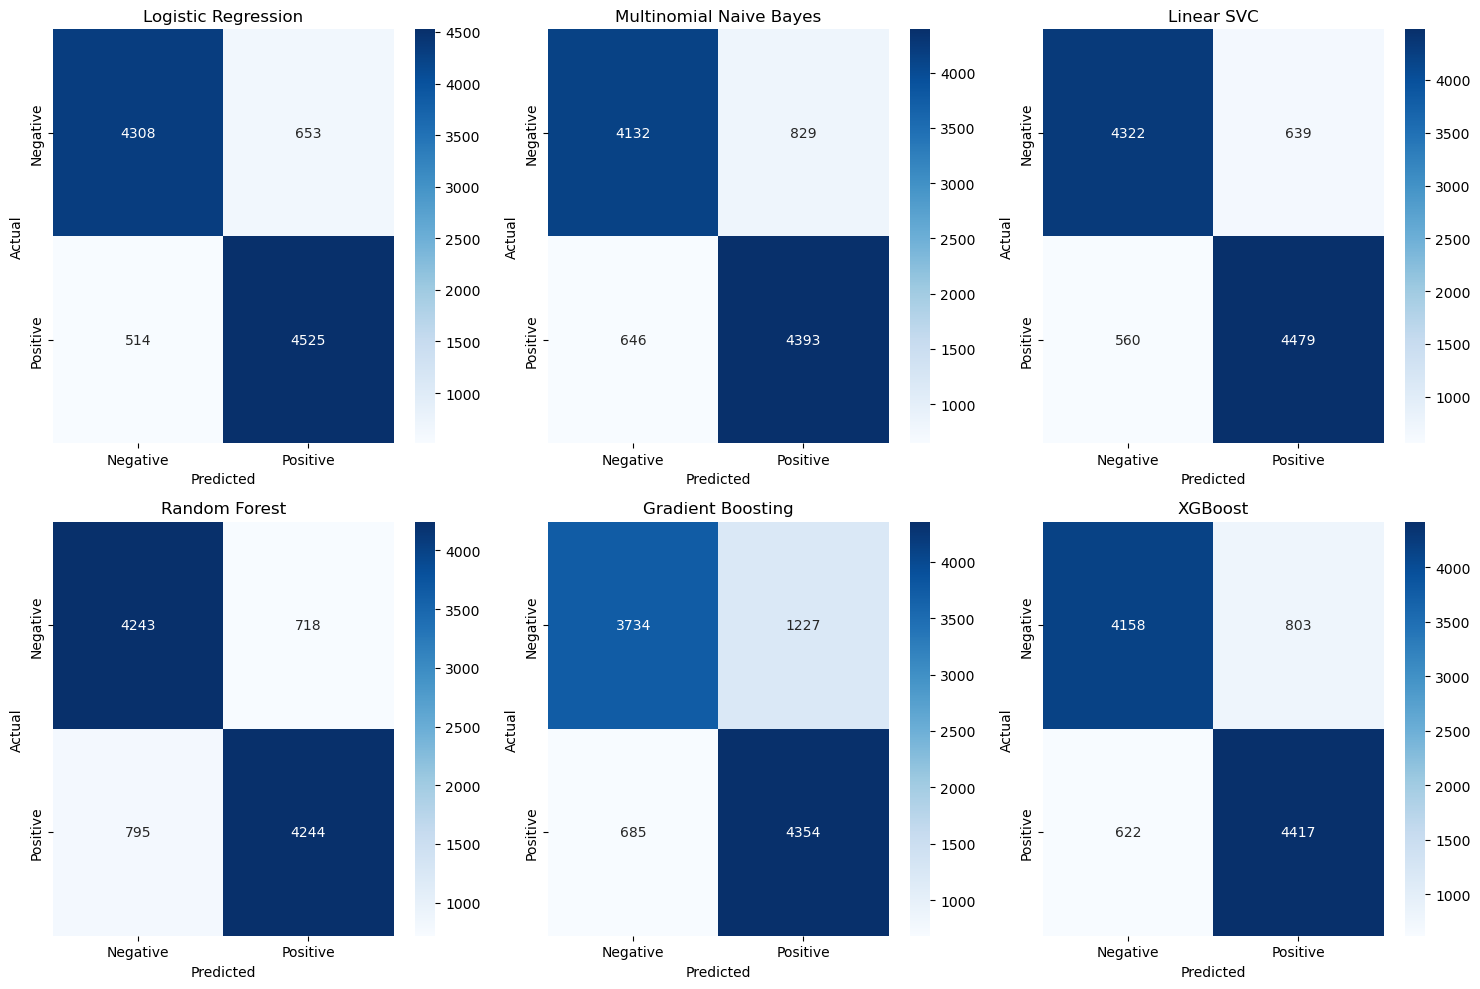

In [20]:
# Visualize Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    print(f"Confusion Matrix for {name}: \n{cm}")  # Debug print
    
    # Ensure the confusion matrix is 2x2 for binary classification
    if cm.shape == (2, 2):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[i])
        axes[i].set_title(name)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    else:
        print(f"Confusion Matrix for {name} is not 2x2: {cm.shape}")

plt.tight_layout()
plt.show()


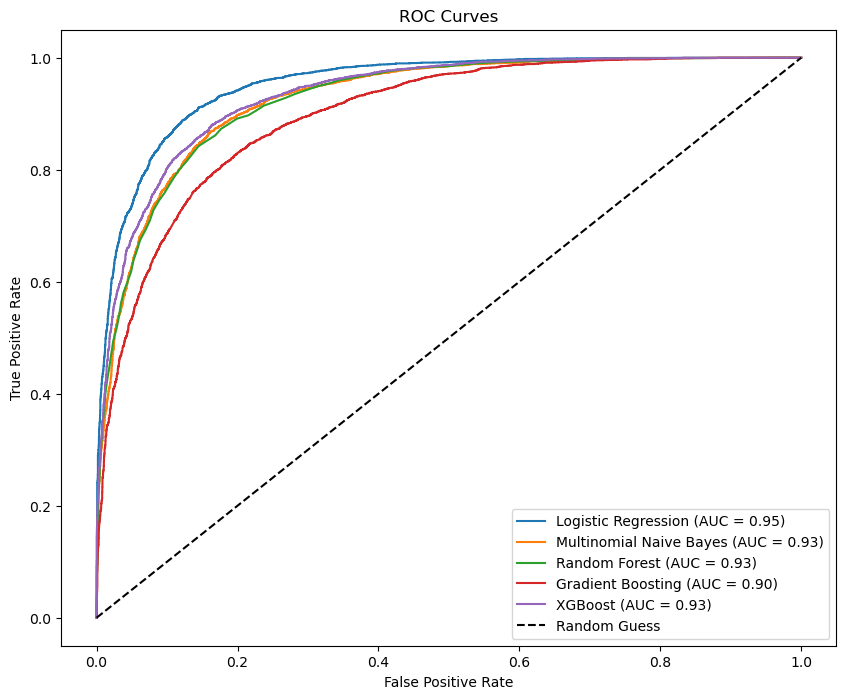

In [23]:
# Plot ROC Curve for all classifiers
plt.figure(figsize=(10, 8))

for name, pipeline in classifiers.items():
    if hasattr(pipeline.named_steps['clf'], "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

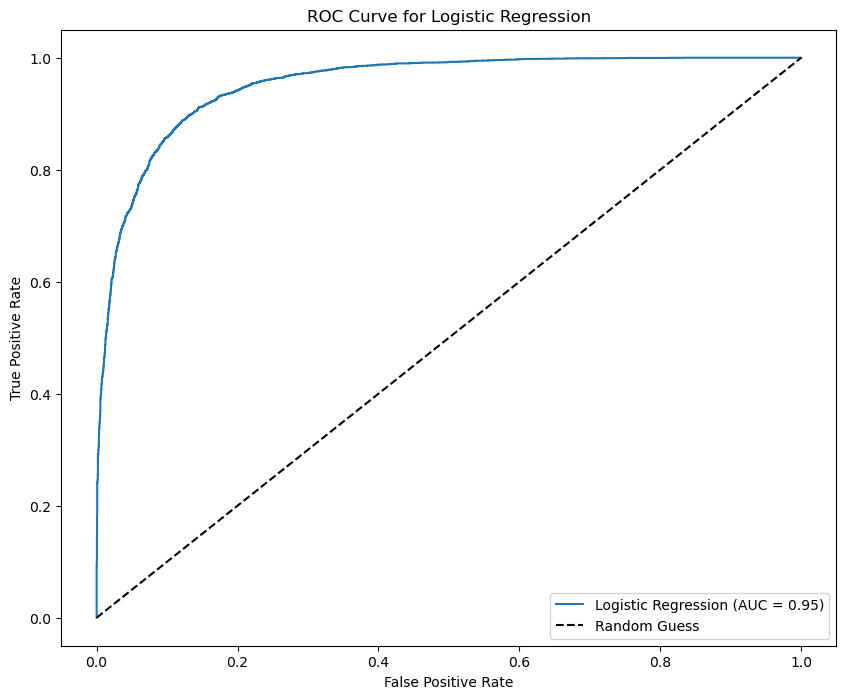

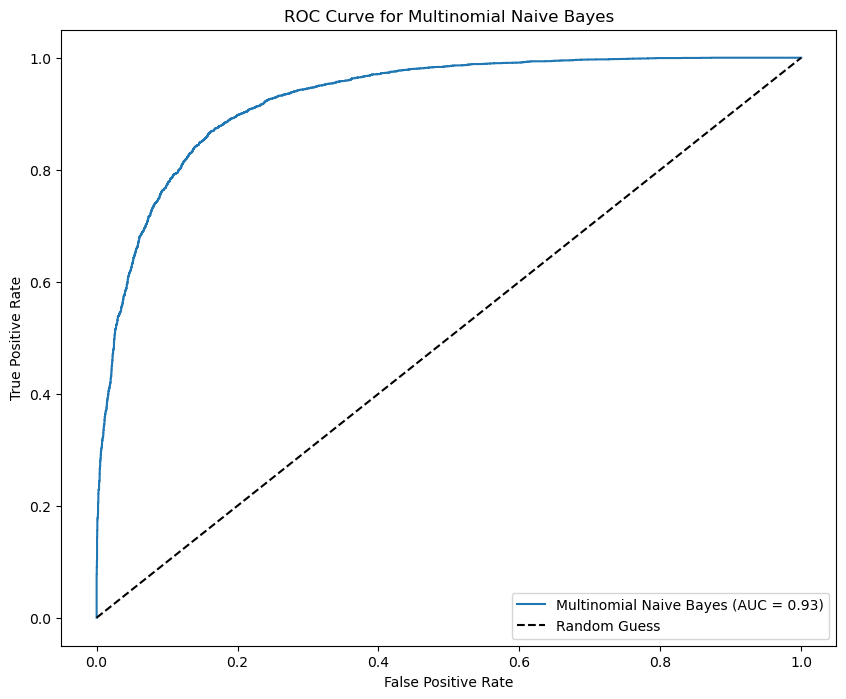

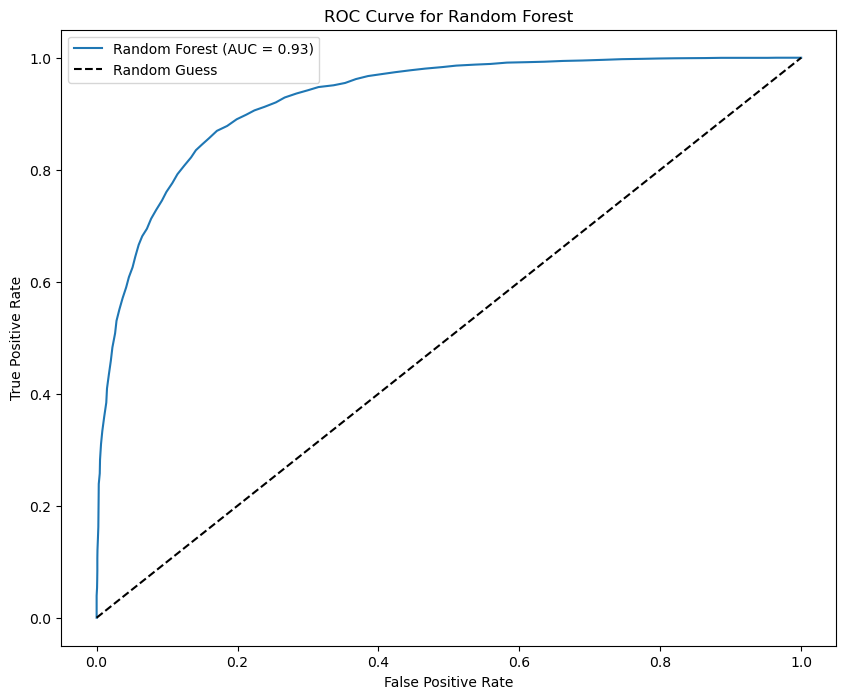

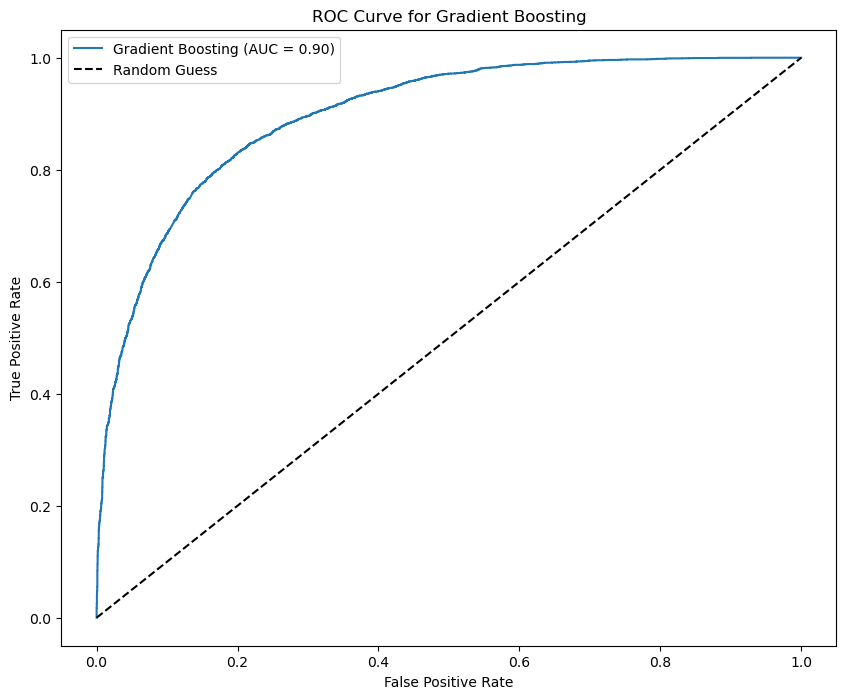

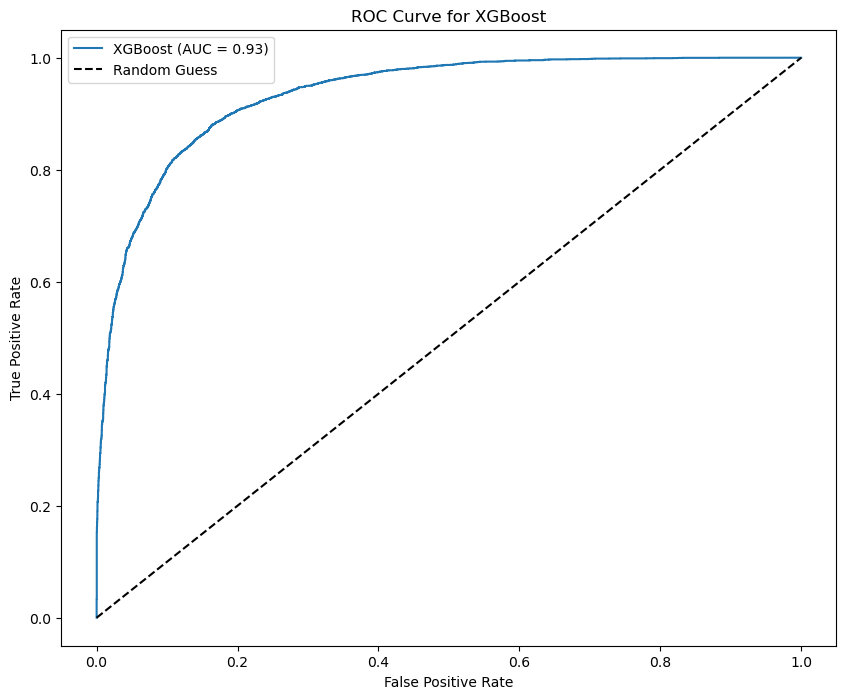

In [30]:
# Plot ROC Curve for each classifier individually
for name, pipeline in classifiers.items():
    if hasattr(pipeline.named_steps['clf'], "predict_proba"):
        # Create a new figure for each classifier
        plt.figure(figsize=(10, 8))
        
        # Predict probabilities
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        # Plot ROC curve for this classifier
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        
        # Add labels and title
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {name}")
        plt.legend()
        
        # Show individual ROC curve
        plt.show()


# Model Evaluation

# Assess accuracy, precision, recall, and F1-score	Comprehensive evaluation report with accuracy, F1-score, and confusion matrix.

### Accuracy, precision, recall, and F1-score are metrics used to evaluate classification models.
### Accuracy gives the overall correctness, precision measures the correctness of positive predictions, recall assesses the ability to capture all actual positives, and F1-score balances precision and recall.
### The confusion matrix summarizes these in terms of true/false positives/negatives.

In [24]:
# Define classifiers with pipelines
classifiers = {
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "Multinomial Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ]),
    "Linear SVC": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LinearSVC())
    ]),
    "Random Forest": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', RandomForestClassifier())
    ]),
    "Gradient Boosting": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', GradientBoostingClassifier())
    ]),
    "XGBoost": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

In [25]:
# Train and evaluate each classifier
results = []
confusion_matrices = {}

for name, pipeline in classifiers.items():
    print(f"Training and evaluating: {name}")

Training and evaluating: Logistic Regression
Training and evaluating: Multinomial Naive Bayes
Training and evaluating: Linear SVC
Training and evaluating: Random Forest
Training and evaluating: Gradient Boosting
Training and evaluating: XGBoost


In [32]:
# Train and evaluate each classifier
results = []
confusion_matrices = {}

for name, pipeline in classifiers.items():
    print(f"\nTraining and evaluating: {name}")
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['clf'], "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    results.append((name, acc))
    
    print(f"\nAccuracy for {name}: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC Score for {name}: {auc:.2f}")



Training and evaluating: Logistic Regression

Accuracy for Logistic Regression: 0.88
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

AUC Score for Logistic Regression: 0.95

Training and evaluating: Multinomial Naive Bayes

Accuracy for Multinomial Naive Bayes: 0.85
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4961
           1       0.84      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

AUC Score for Multinomial Naive Bayes: 0.93

Training and evaluating: Linear SVC


C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Accuracy for Linear SVC: 0.88
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Training and evaluating: Random Forest

Accuracy for Random Forest: 0.84
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

AUC Score for Random Forest: 0.93

Training and evaluating: Gradient Boosting

Accuracy for Gradient Boosting: 0.81
              precision    recall  f1-score   support

           0       0.84      0.75      0.80      4961
           1    

C:\Users\sidba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Accuracy for XGBoost: 0.86
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

AUC Score for XGBoost: 0.93


In [33]:
# Compare Results
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy"])
print("\nComparison of Classifier Performance:")
print(results_df)


Comparison of Classifier Performance:
                Classifier  Accuracy
0      Logistic Regression    0.8833
1  Multinomial Naive Bayes    0.8525
2               Linear SVC    0.8801
3            Random Forest    0.8446
4        Gradient Boosting    0.8088
5                  XGBoost    0.8575


# Classifier Accuracy Comparison Using -
# 1.Bar Plot

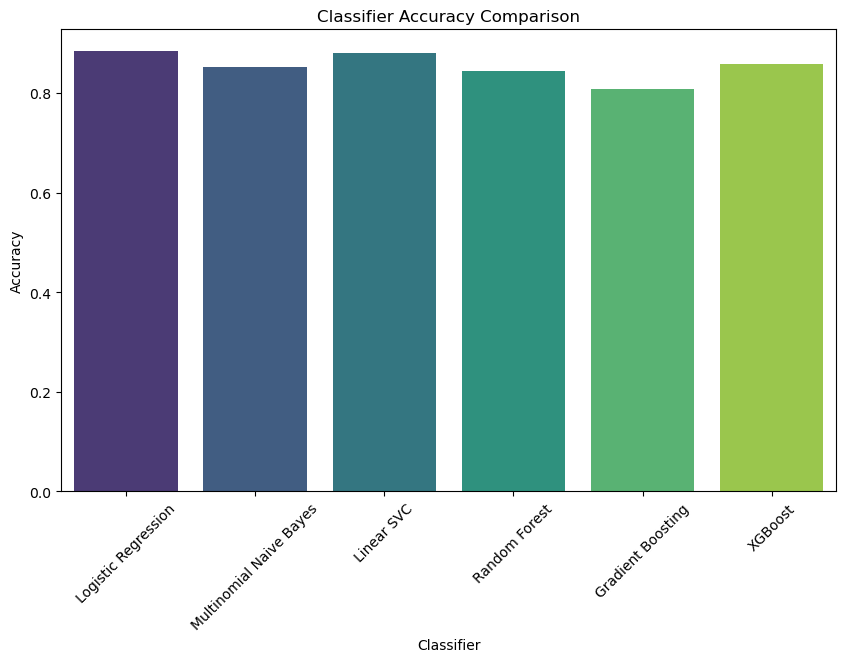

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming accuracy_results
accuracy_results = {
    'Logistic Regression': 0.8833,
    'Multinomial Naive Bayes': 0.8525,
    'Linear SVC': 0.8801,
    'Random Forest': 0.8446,
    'Gradient Boosting': 0.8088,
    'XGBoost': 0.8575
}

# Convert the dictionary to a DataFrame for easier plotting
df = pd.DataFrame(list(accuracy_results.items()), columns=['Classifier', 'Accuracy'])

# Vertical bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Classifier', y='Accuracy', data=df, palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # Rotate x-axis labels 
plt.show()



# 2.Radar Chart 

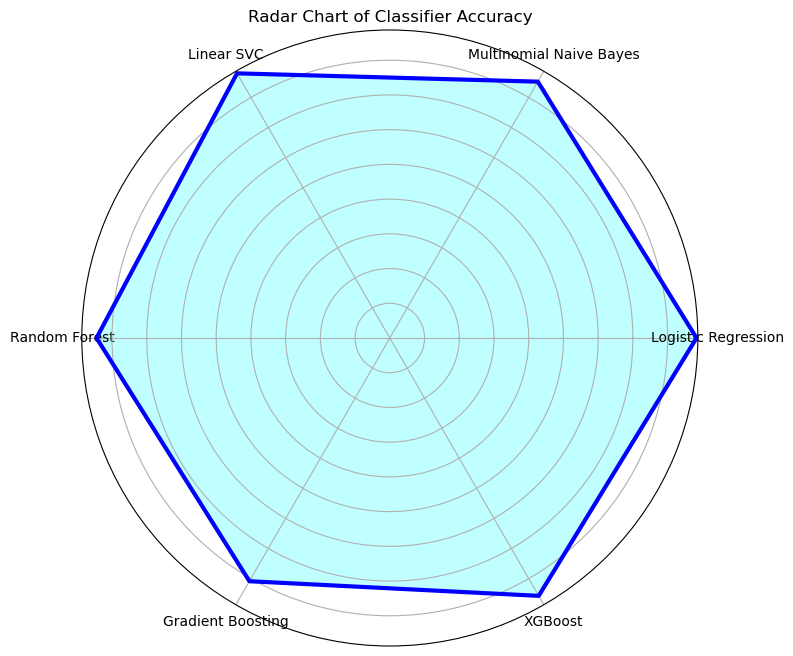

In [42]:
import numpy as np

# Extract classifier names and accuracy values
categories = list(accuracy_results.keys())
accuracy = list(accuracy_results.values())

# Number of classifiers
N = len(categories)

# Compute angle for each classifier
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Repeat the first value to close the circle
accuracy += accuracy[:1]
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the data
ax.fill(angles, accuracy, color='cyan', alpha=0.25)
ax.plot(angles, accuracy, color='blue', linewidth=3)

# Set the labels
ax.set_yticklabels([])  # Hide the radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Radar Chart of Classifier Accuracy')
plt.show()


# 3.Scatter plot

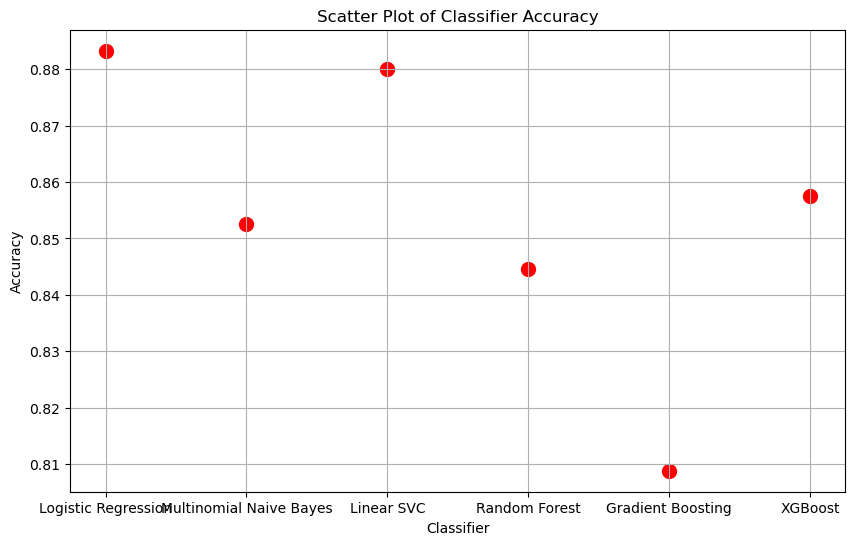

In [44]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(accuracy_results.keys(), accuracy_results.values(), color='red', s=100, label='Accuracy')

# Add titles and labels
plt.title('Scatter Plot of Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Show grid and plot
plt.grid(True)
plt.show()


# 4. Line graph

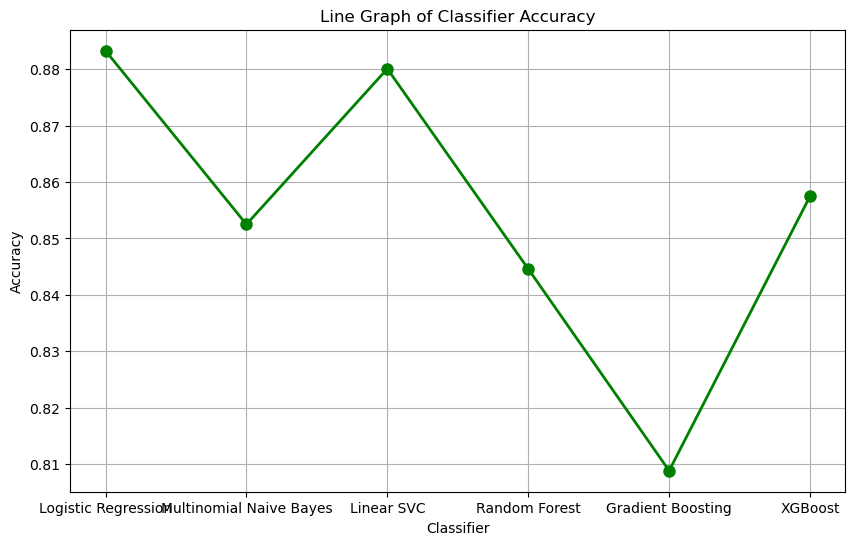

In [45]:
# Line graph
plt.figure(figsize=(10,6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o', color='green', linewidth=2, markersize=8)

# Add titles and labels
plt.title('Line Graph of Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Show grid and plot
plt.grid(True)
plt.show()


# Plotting ROC Curve and Calculating AUC for Model Evaluation

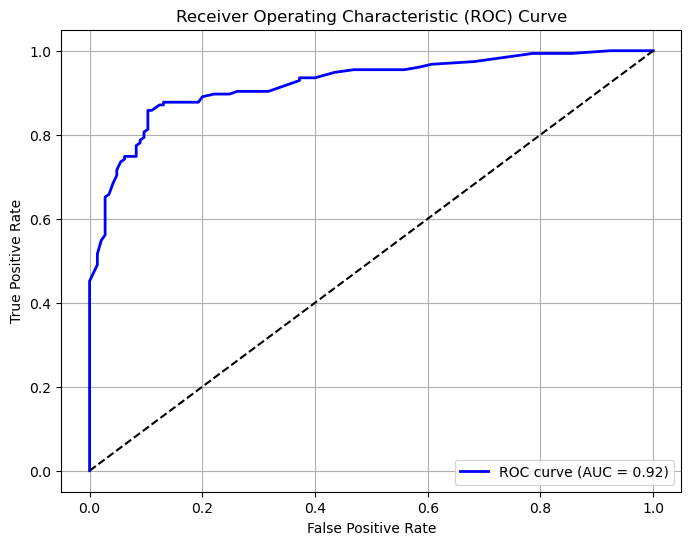

AUC: 0.92


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line representing random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the AUC value
print(f"AUC: {roc_auc:.2f}")
